# 2019-01-31 - Removing artifacts from png
Nelson a trouvé un artefact de noramlisation des png, est-ce une erreur de sauvegarde et pas de format ? 

In [1]:
import os
import numpy as np
import MotionClouds as mc
import datetime
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import imageio
import warnings

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X//downscale, mc.N_Y//downscale, mc.N_frame//downscale)

now = datetime.datetime.now()
strtime = now.strftime("%Y-%m-%d_%H:%M:%S")   

mc.figpath = os.path.join('sequences/MC%s'% strtime)
if not(os.path.isdir(mc.figpath)): os.mkdir(mc.figpath)

The [Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is the probability distribution that describes the time between events in a Poisson point process

In [2]:
def make_one_block(N_X, N_Y, seed, B_thetas, N_frame_total,  
                   N_frame_mean=6, N_theta=12, contrast=1.,
                  refresh_rate = 120, duration = 60,mean_duration = 3):
    fx, fy, ft = mc.get_grids(N_X, N_Y, 1)

    rng = np.random.RandomState(seed)

    N_frame = 0
    im = np.zeros((N_X, N_Y, 0))
    disk = mc.frequency_radius(fx, fy, ft) < .5
    itr = 0
    
    if duration != None and mean_duration != None and refresh_rate != None :
        N_frame_total = refresh_rate * duration
        N_frame_mean = refresh_rate * mean_duration
    
    while N_frame < N_frame_total:
        itr +=1
        N_frame_sub = int(rng.exponential(N_frame_mean))+1
        theta = np.int(rng.rand()*N_theta) * np.pi / N_theta
        B_theta = B_thetas[rng.randint(len(B_thetas))]
        mc_i = mc.envelope_gabor(fx, fy, ft, 
                                         V_X=0., V_Y=0., B_V=0., 
                                         sf_0=sf_0, B_sf=B_sf, 
                                         theta=theta, B_theta=B_theta)
        im_ = np.zeros((N_X, N_Y, 1))
        im_ += mc.rectif(mc.random_cloud(mc_i, seed=seed+N_frame), contrast=contrast)
        im_ *= disk # masking outside the disk 
        im_ += .5*(1-disk) # gray outside the disk
        im_ = im_ * np.ones((1, 1, N_frame_sub)) #  expand to N_frame_sub frames

        im_[6:20,6:20,:] = 1
        if itr % 2 == 0 :
            im_[6:20,6:20,-3:-1] = 0
        else :
            im_[6:20,6:20,-1] = 0 
        im = np.concatenate((im, im_), axis=-1) # montage
        N_frame = im.shape[-1]

        #data appending
        with open(mc.figpath+'/'+'sequence.csv', "a+") as writer_file:
            data_writer = csv.writer(writer_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            data_writer.writerow([itr, N_frame, N_frame/refresh_rate, 
                                  theta, B_theta, sf_0, B_sf, N_X, N_Y, N_frame_total, refresh_rate])

    return im[:, :, :N_frame_total], itr

#Parameters
N_X = fx.shape[0]
width = 29.7*256/1050 
N_X, N_Y = mc.N_X, mc.N_Y

N_frame_total = 200
N_frame_mean = 12
N_theta = 12

sf_0 = 4.*width/N_X
B_V = .0     # BW temporal frequency (speed plane thickness)
B_sf = sf_0   # BW spatial frequency

B_thetas = [np.pi/32, np.pi/16, np.pi/8, np.pi/4] #bandwidth opening choices
seed = 42 #standardized random vector

#Overrides N_frame total, nframe mean
refresh_rate = 60 #Hz
duration = 30 #s
mean_duration = 3 #s

'''refresh_rate = None #Hz
duration = None #s
mean_duration = None #s'''


#refresh rate and duration and mean duration override the N_frame total;N_frame_mean unless left to None
im = make_one_block(N_X, N_Y, seed=seed, B_thetas=B_thetas, 
                    N_frame_total=N_frame_total, N_frame_mean=12, N_theta=12,
                   refresh_rate = refresh_rate, duration = duration, mean_duration = mean_duration)

warnings.filterwarnings("ignore")
for i in tqdm(range(im[0].shape[-1])):
    imageio.imwrite(mc.figpath+'/%s.png' % i , np.rot90(im[0][:,:,i]))

  3%|▎         | 56/1800 [00:00<00:16, 106.67it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


  6%|▋         | 113/1800 [00:01<00:15, 105.71it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 10%|▉         | 179/1800 [00:01<00:15, 101.60it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 13%|█▎        | 234/1800 [00:02<00:15, 101.97it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 17%|█▋        | 300/1800 [00:02<00:14, 103.54it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 20%|█▉        | 355/1800 [00:03<00:14, 103.02it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 23%|██▎       | 416/1800 [00:03<00:12, 112.36it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 26%|██▋       | 477/1800 [00:04<00:11, 114.88it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 30%|██▉       | 539/1800 [00:04<00:10, 117.11it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 33%|███▎      | 600/1800 [00:05<00:10, 117.71it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 37%|███▋      | 665/1800 [00:06<00:09, 119.58it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 40%|███▉      | 716/1800 [00:06<00:08, 120.84it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 43%|████▎     | 781/1800 [00:07<00:08, 120.82it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 47%|████▋     | 846/1800 [00:07<00:07, 120.63it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 50%|█████     | 909/1800 [00:08<00:07, 120.41it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 54%|█████▍    | 972/1800 [00:08<00:07, 116.02it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 57%|█████▋    | 1022/1800 [00:09<00:06, 117.59it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 60%|██████    | 1084/1800 [00:09<00:06, 119.22it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 64%|██████▎   | 1145/1800 [00:10<00:05, 118.58it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 67%|██████▋   | 1208/1800 [00:10<00:04, 121.52it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 71%|███████   | 1273/1800 [00:11<00:04, 122.76it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 74%|███████▍  | 1337/1800 [00:11<00:03, 119.26it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 77%|███████▋  | 1387/1800 [00:12<00:03, 120.09it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 81%|████████  | 1451/1800 [00:12<00:02, 117.70it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 84%|████████▍ | 1512/1800 [00:13<00:02, 118.73it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 88%|████████▊ | 1577/1800 [00:13<00:01, 120.28it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 91%|█████████ | 1641/1800 [00:14<00:01, 119.96it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 95%|█████████▍| 1702/1800 [00:14<00:00, 115.52it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


 98%|█████████▊| 1764/1800 [00:15<00:00, 118.11it/s]WARNING:root:Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


100%|██████████| 1800/1800 [00:15<00:00, 115.59it/s]


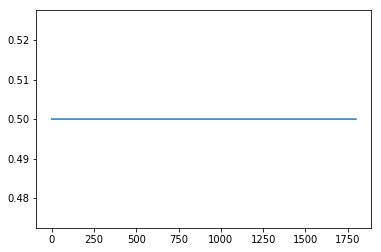

In [3]:
plt.plot(im[0][20,20,:])

In [4]:
pixvals = []
for i in range(im[0].shape[-1]):
    pixval = imageio.imread('./sequences/MC2019-01-31_17:40:06/%s.png'%i)[20,20]
    pixvals.append(pixval)

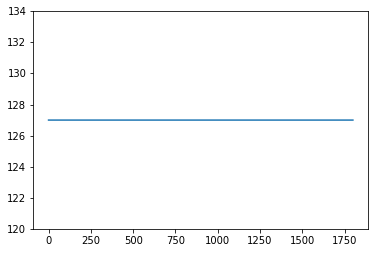

In [5]:
plt.plot(pixvals)

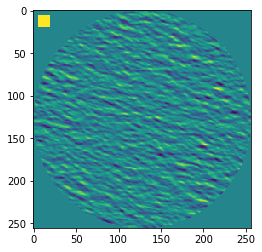

In [6]:
plt.imshow(im[0][:,:,0])

# Protocol description

In [7]:
print('Total duration of %s frames, which is %.3fs at %s Hz' % (N_frame_total, N_frame_total/refresh_rate, refresh_rate))
print('A total of %s blocks where generated, with the mean duration of each block being %s frames' % (im[1],N_frame_mean))
print('%s differents angles where shown, with %s possible bandwiths' % (N_theta, len(B_thetas)))
print('-----------------\nAll files were saved in /%s with format %s' % (mc.figpath, vext))

Total duration of 200 frames, which is 3.333s at 60 Hz
A total of 10 blocks where generated, with the mean duration of each block being 12 frames
12 differents angles where shown, with 4 possible bandwiths


NameError: name 'vext' is not defined

# Adapting the spatial frequency parameters for the screen (and the mouse)

My version :

In [ ]:
object_px = N_X #px
dpi = 72 #dot per inches
pixel_per_cm = dpi* .393701 #pixel per cm
distance = 60 #cm

object_size_cm = object_px/pixel_per_cm #cm

object_size_angles = np.degrees(2* np.arctan( (object_size_cm/2)/distance))
deg_per_px = object_size_angles/N_X
print('The size of the MC is %s degrees' % object_size_angles)
print('The size of a single pixel is %s degrees' % (object_size_angles/N_X))

Laurent's (probably the one that's correct)

viewingDistance = 60 # cm A MODIFIER
screen_width_cm = 30 # cm A MODIFIER

print('Visual angle of the screen', 2*np.arctan(screen_width_cm/2/viewingDistance)*180/np.pi)
print('Degrees per centimeter', 2*np.arctan(screen_width_cm/2/viewingDistance)*180/np.pi/screen_width_cm)

screen_width_px = 1600 # pixels 
screen_height_px = 900 # pixels

deg_per_px = 2*np.arctan(screen_width_cm/2/viewingDistance)*180/np.pi/screen_width_px
print('Degrees per pixel', deg_per_px)

stim_size = deg_per_px*N_X
print('Stimulus angular size', stim_size)

The central spatial frequency ``sf_0`` is defined as the frequency (number of cycles) *per pixel*, so that to get 

In [ ]:
print('width of these motion clouds (', N_X, ', ', N_Y, ')')
print('width of stimulus in degrees', N_X * deg_per_px)
phi_sf_0 = .5 # Optimal spatial frequency [cpd]
print('Optimal spatial frequency in cycles per degree', phi_sf_0)
print('Optimal spatial frequency in cycles per window = ', phi_sf_0 *  N_X * deg_per_px)
sf_0 = phi_sf_0 * deg_per_px
print('cycles per pixel = ', sf_0)

Similarly the spatial frequeny bandwidth as a function of the experimental parameters:

In [ ]:
phi_sf_0 = .5 # Optimal spatial frequency [cpd] https://www.sciencedirect.com/science/article/pii/S0042698904004390
phi_B_sf = 2. # Optimal spatial frequency bandwidth [in octaves]
B_Sf = sf_0 # good qualitative approximation

In [ ]:
phi_B_V = 5. # Optimal temporal frequency bandwidth [Hz]

#tf_opt = 1 # Hz
T = 0.250            # Stimulus duration [s] 
framerate = 100.    # Refreshing rate in [Hz]
Bv = phi_B_V # good qualitative approximation 

In one script:

import numpy as np
import MotionClouds as mc
import os

# Clouds parameters in absolute units
N_X = 512
width = 29.7*N_X/1050
phi_sf_0 = .5 # Optimal spatial frequency [cpd]

sf_0 = phi_sf_0*width/N_X
B_sf = sf_0   # BW spatial frequency
B_V = .5     # BW temporal frequency (speed plane thickness) WARNING temporal autocorrelation depends on N_frame

# generate zip files
dry_run = True
dry_run = False
      
for seed in [2016 + i for i in range(7)]:
    name_ = name + '_seed_' + str(seed)
    if not dry_run:
        if  not(os.path.isfile(os.path.join(mc.figpath, name_ + vext))):
            im = make_one_block(N_X, N_X, seed=seed, B_thetas=B_thetas, N_frame_total=200, N_frame_mean=25, N_theta=12)
            mc.anim_save(mc.rectif(im, contrast=contrast), os.path.join(mc.figpath, name_), vext=vext)
        else:
            print(' MC ' + os.path.join(mc.figpath, name_) + ' already done')
    else:
        print(' MC ' + os.path.join(mc.figpath, name_) + ' skipped  (dry run)')
